<a href="https://colab.research.google.com/github/ImNotDanish05/2025_PBO_TI-1A/blob/main/Jobsheet_12_Tugas_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import folium

In [33]:
# Contoh Map
peta_semarang = folium.Map(location=[-6.9929, 110.4200], zoom_start=13)
folium.Marker(
 location=[-6.9829, 110.4259], # Koordinat (latitude, longitude)
 popup='<i>Simpang Lima</i>', # Konten HTML saat marker diklik
 tooltip='Klik untuk info!' # Teks saat mouse hover
).add_to(peta_semarang) # Tambahkan marker ke objek peta
# Simpan peta ke file HTML
peta_semarang.save("peta_semarang.html")
print("Peta berhasil disimpan ke peta_semarang.html")
peta_semarang

Peta berhasil disimpan ke peta_semarang.html


# **Praktikum 01: Persiapan Data (Membuat File CSV)**

In [53]:
# File 1: lokasi_semarang.csv
%%writefile lokasi_semarang.csv
Nama,Latitude,Longitude,Tipe,Deskripsi
Lawang Sewu,-6.9840,110.4105,Wisata Sejarah,"Bangunan bersejarah peninggalan Belanda dengan banyak pintu."
Simpang Lima,-6.9929,110.4200,Landmark,"Alun-alun pusat kota Semarang, tempat berkumpul populer."
Masjid Agung Jawa Tengah,-6.9892,110.4452,Tempat Ibadah,"Masjid besar dengan arsitektur megah dan menara pandang Asmaul Husna."
Klenteng Sam Poo Kong,-6.9980,110.4030,Tempat Ibadah,"Klenteng bersejarah peninggalan Laksamana Cheng Ho."
Brown Canyon,-7.0375,110.4875,Wisata Alam,"Tebing bekas penambangan galian C yang unik menyerupai Grand Canyon."
Lumpia Gang Lombok,-6.9718,110.4255,Kuliner,"Salah satu tempat makan lumpia legendaris dan otentik di Semarang."
Kota Lama,-6.9690,110.4250,Wisata Sejarah,"Kawasan cagar budaya dengan bangunan-bangunan kuno bergaya Eropa."
Pantai Marina,-6.9585,110.3875,Wisata Alam,"Kawasan pantai rekreasi di bagian utara kota."
Toko Oen,-6.9715,110.4235,Kuliner,"Restoran dan toko es krim legendaris sejak zaman kolonial."
Museum Rekor Indonesia (MURI),-6.9855,110.4200,Wisata Edukasi (T1),"Menampilkan berbagai rekor unik yang tercatat di Indonesia"
Taman Mini Maerokoco,-6.9800,110.3750,Wisata Edukasi (T2),"Miniatur Jawa Tengah, dilengkapi dengan anjungan dari 35 Kabupaten dan Kota"
Kebun Binatang Semarang (Semarang Zoo),-7.0300,110.4200,Wisata Alam (T3),"Tempat untuk beberapa jenis binatang yang unik!"
Desa Wisata Kandiri,-7.0250,110.3700,Wisata Alam (T4),"Desa dengan wisata alam yang keren seperti Goa Kreo"
Kuliner Malam Pencinan,-6.9720,110.4280,Kuliner (T5),"Kawasan Kuliner malam dengan berbagai pilihan makanan khas Tionghoa dan lokal"
SD Negeri Sampangan 01,-6.9879,110.3897,Edukasi Sekolah Dasar,"Sekolah dasar negeri yang terletak di kawasan Sampangan, terkenal dengan lingkungan yang hijau dan nyaman."
SMP Negeri 5 Semarang,-6.9782,110.4210,Edukasi Sekolah Menengah Pertama,"Salah satu SMP favorit di Semarang yang berada dekat kawasan Simpang Lima, punya banyak prestasi akademik dan non-akademik."
SMA Negeri 3 Semarang,-6.9835,110.4088,Sekolah Menengah Atas,"Sekolah menengah atas unggulan di Semarang, dikenal dengan tradisi dan prestasi panjang, serta gedung ikonik di pusat kota."

Overwriting lokasi_semarang.csv


In [100]:
# File 2: config_peta.txt
%%writefile config_peta.txt
-6.9929
110.4200
100

Overwriting config_peta.txt


In [ ]:
-6.9929
110.4200
13

Teks Simpanan:

Kampoeng Kopi Banaran,-7.2780,110.4010,Wisata Alam,"Agrowisata kebun kopi dengan pemandangan dan restoran."

# **Praktikum 02: Membaca Data CSV dengan Pandas**

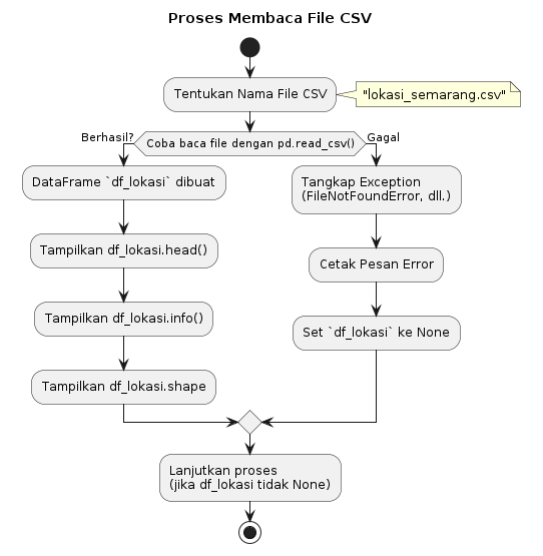

In [35]:
# Impor library pandas
import pandas as pd

# Nama file CSV yang akan dibaca
NAMA_FILE_CSV = "lokasi_semarang.csv"

def baca_data_lokasi(nama_file: str) -> pd.DataFrame | None:
    """
    Membaca data lokasi dari file CSV menggunakan Pandas.

    Args:
        nama_file (str): Path atau nama file CSV yang akan dibaca.

    Returns:
        pd.DataFrame | None: DataFrame Pandas berisi data jika berhasil,
        None jika file tidak ditemukan atau error lain.
    """
    print(f"Mencoba membaca file CSV: {nama_file}")
    try:
        # Membaca file CSV dengan pandas
        dataframe = pd.read_csv(nama_file)
        print(" -> File CSV berhasil dibaca.")
        return dataframe
    except FileNotFoundError:
        print(f" -> ERROR: File '{nama_file}' tidak ditemukan!")
        return None
    except pd.errors.EmptyDataError:
        print(f" -> ERROR: File '{nama_file}' kosong.")
        return None
    except Exception as e:
        print(f" -> ERROR saat membaca file CSV: {type(e).__name__} - {e}")
        return None

# --- Kode Utama ---
if __name__ == "__main__":
    print("--- Memulai Praktikum 2: Membaca CSV ---")

    # Panggil fungsi untuk membaca data
    df_lokasi = baca_data_lokasi(NAMA_FILE_CSV)

    # Periksa apakah pembacaan berhasil
    if df_lokasi is not None:
        print("\n--- Inspeksi Awal DataFrame ---")

        # 1. Tampilkan 5 baris pertama
        print("\n1. Lima Baris Pertama (head()):")
        print(df_lokasi.head())

        # 2. Tampilkan info ringkas
        print("\n2. Informasi DataFrame (info()):")
        df_lokasi.info()

        # 3. Tampilkan dimensi data
        jumlah_baris, jumlah_kolom = df_lokasi.shape
        print(f"\n3. Dimensi Data:")
        print(f" Jumlah Lokasi (Baris) : {jumlah_baris}")
        print(f" Jumlah Atribut (Kolom): {jumlah_kolom}")

        # 4. Tampilkan nama kolom
        print(f"\n4. Nama Kolom:")
        print(list(df_lokasi.columns))
    else:
        print("\nTidak dapat melanjutkan inspeksi karena gagal membaca file CSV.")

    print("\n--- Praktikum 2 Selesai ---")

--- Memulai Praktikum 2: Membaca CSV ---
Mencoba membaca file CSV: lokasi_semarang.csv
 -> File CSV berhasil dibaca.

--- Inspeksi Awal DataFrame ---

1. Lima Baris Pertama (head()):
                       Nama  Latitude  Longitude            Tipe  \
0               Lawang Sewu   -6.9840   110.4105  Wisata Sejarah   
1              Simpang Lima   -6.9929   110.4200        Landmark   
2  Masjid Agung Jawa Tengah   -6.9892   110.4452   Tempat Ibadah   
3     Klenteng Sam Poo Kong   -6.9980   110.4030   Tempat Ibadah   
4              Brown Canyon   -7.0375   110.4875     Wisata Alam   

                                           Deskripsi  
0  Bangunan bersejarah peninggalan Belanda dengan...  
1  Alun-alun pusat kota Semarang, tempat berkumpu...  
2  Masjid besar dengan arsitektur megah dan menar...  
3  Klenteng bersejarah peninggalan Laksamana Chen...  
4  Tebing bekas penambangan galian C yang unik me...  

2. Informasi DataFrame (info()):
<class 'pandas.core.frame.DataFrame'>
RangeI

# **Praktikum 03: Mendesain dan Membuat Kelas OOP**

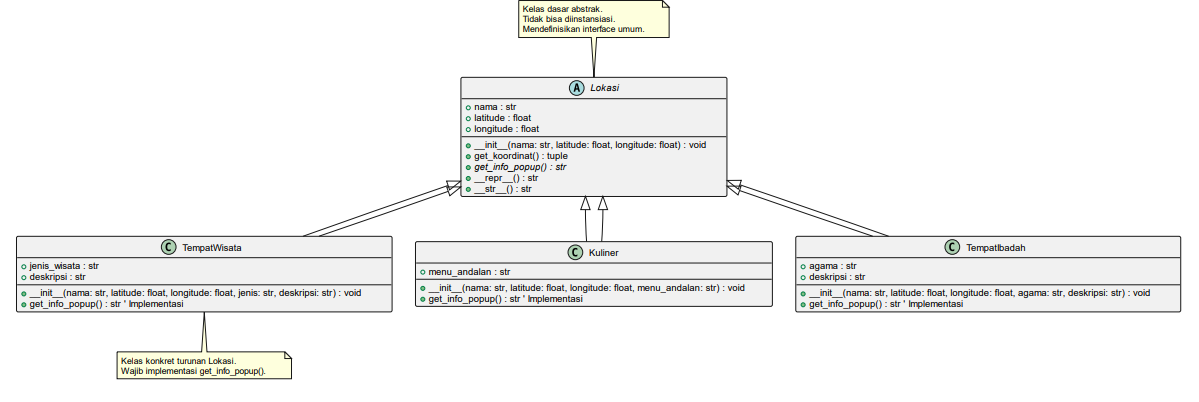

In [36]:
class Buku:
    def __init__(self, judul, penulis, tahun, jml_halaman):
        self.judul = judul
        self.penulis = penulis
        self.tahun = tahun
        self.jml_halaman = max(0, jml_halaman)  # Pastikan non-negatif

    def __str__(self):
        return f"'{self.judul}' ({self.tahun})"  # Versi singkat

    def __repr__(self):
        return (f"Buku(judul='{self.judul}', penulis='{self.penulis}', "
                f"tahun={self.tahun}, jml_halaman={self.jml_halaman})")

    def __len__(self):
        return self.jml_halaman

    # --- Implementasi Perbandingan ---

    def __eq__(self, other):
        """Bandingkan kesamaan berdasarkan judul dan penulis."""
        print(f"-> Memanggil __eq__: Membandingkan '{self.judul}' == '{getattr(other, 'judul', '?')}'")
        if isinstance(other, Buku):
            return (self.judul == other.judul) and (self.penulis == other.penulis)
        return NotImplemented

    def __lt__(self, other):
        """Bandingkan berdasarkan tahun terbit (lebih kecil dari)."""
        print(f"-> Memanggil __lt__: Membandingkan '{self.judul}' ({self.tahun}) < '{getattr(other, 'judul', '?')}' ({getattr(other, 'tahun', '?')})")
        if isinstance(other, Buku):
            return self.tahun < other.tahun
        return NotImplemented


# --- Kode Utama ---
if __name__ == "__main__":
    buku_A = Buku("Sejarah Jawa Kuno", "Prof. X", 1995, 450)
    buku_B = Buku("Teknologi AI", "Dr. Y", 2022, 300)
    buku_C = Buku("Sejarah Jawa Kuno", "Prof. X", 1995, 500)  # Sama judul & penulis dgn A
    buku_D = Buku("Pengantar Python", "Prof. X", 2018, 400)

    print("\n--- Perbandingan Kesamaan (==) ---")
    print(f"'{buku_A.judul}' == '{buku_B.judul}' ? {buku_A == buku_B}")  # False
    print(f"'{buku_A.judul}' == '{buku_C.judul}' ? {buku_A == buku_C}")  # True
    print(f"'{buku_A.judul}' == 'Teks' ? {buku_A == 'Teks'}")            # False

    print("\n--- Perbandingan Kurang Dari (<) ---")
    print(f"{buku_A} < {buku_B} ? {buku_A < buku_B}")  # True
    print(f"{buku_B} < {buku_A} ? {buku_B < buku_A}")  # False
    print(f"{buku_A} < {buku_C} ? {buku_A < buku_C}")  # False
    print(f"{buku_A} < {buku_D} ? {buku_A < buku_D}")  # True

    print("\n--- Perbandingan Lain (Otomatis dari __lt__ dan __eq__) ---")
    print(f"{buku_B} > {buku_A} ? {buku_B > buku_A}")        # True
    print(f"{buku_A} != {buku_B} ? {buku_A != buku_B}")      # True

    print("\n--- Perbandingan dengan Tipe Lain ---")
    try:
        hasil_error = buku_A < 5
        print(f"Hasil buku_A < 5 : {hasil_error}")
    except TypeError as e:
        print(f"Error saat membandingkan buku_A < 5: {e}")


--- Perbandingan Kesamaan (==) ---
-> Memanggil __eq__: Membandingkan 'Sejarah Jawa Kuno' == 'Teknologi AI'
'Sejarah Jawa Kuno' == 'Teknologi AI' ? False
-> Memanggil __eq__: Membandingkan 'Sejarah Jawa Kuno' == 'Sejarah Jawa Kuno'
'Sejarah Jawa Kuno' == 'Sejarah Jawa Kuno' ? True
-> Memanggil __eq__: Membandingkan 'Sejarah Jawa Kuno' == '?'
'Sejarah Jawa Kuno' == 'Teks' ? False

--- Perbandingan Kurang Dari (<) ---
-> Memanggil __lt__: Membandingkan 'Sejarah Jawa Kuno' (1995) < 'Teknologi AI' (2022)
'Sejarah Jawa Kuno' (1995) < 'Teknologi AI' (2022) ? True
-> Memanggil __lt__: Membandingkan 'Teknologi AI' (2022) < 'Sejarah Jawa Kuno' (1995)
'Teknologi AI' (2022) < 'Sejarah Jawa Kuno' (1995) ? False
-> Memanggil __lt__: Membandingkan 'Sejarah Jawa Kuno' (1995) < 'Sejarah Jawa Kuno' (1995)
'Sejarah Jawa Kuno' (1995) < 'Sejarah Jawa Kuno' (1995) ? False
-> Memanggil __lt__: Membandingkan 'Sejarah Jawa Kuno' (1995) < 'Pengantar Python' (2018)
'Sejarah Jawa Kuno' (1995) < 'Pengantar Pytho

# **Praktikum 04: Membuat Objek dari Data Pandas**

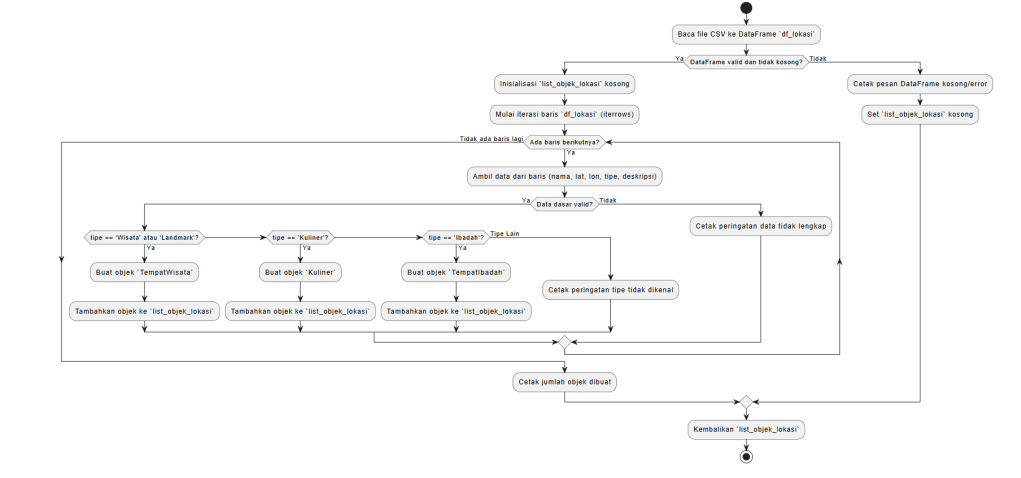

In [56]:
# --- Definisi Kelas ---
# Untuk nomor 4 hingga 6
class Lokasi(ABC):
    def __init__(self, nama: str, latitude: float, longitude: float):
        self.nama = str(nama) if nama else "Tanpa Nama"
        try:
            self.latitude = float(latitude)
            self.longitude = float(longitude)
        except (ValueError, TypeError, SystemError):
            self.latitude = 0.0
            self.longitude = 0.0

    def get_koordinat(self) -> tuple:
        return (self.latitude, self.longitude)

    @abstractmethod
    def get_info_popup(self) -> str:
        pass

    def __repr__(self) -> str:
        return f"{type(self).__name__}(nama='{self.nama}', lat={self.latitude:.4f}, lon={self.longitude:.4f})"

    def __str__(self) -> str:
        return f"{self.nama} [{type(self).__name__}]"

class TempatWisata(Lokasi):
    def __init__(self, nama: str, latitude: float, longitude: float, jenis: str, deskripsi: str):
        super().__init__(nama, latitude, longitude)
        self.jenis_wisata = str(jenis) if jenis else "Umum"
        self.deskripsi = str(deskripsi) if deskripsi else "Tidak ada deskripsi."

    def get_info_popup(self) -> str:
        return f"<h4><b>{self.nama}</b></h4><i>{self.jenis_wisata}</i><br><br>{self.deskripsi}<br><br>Koordinat: ({self.latitude:.4f}, {self.longitude:.4f})"

class Kuliner(Lokasi):
    def __init__(self, nama: str, latitude: float, longitude: float, menu_andalan: str):
        super().__init__(nama, latitude, longitude)
        self.menu_andalan = str(menu_andalan) if menu_andalan else "Tidak diketahui"

    def get_info_popup(self) -> str:
        return f"<h4><b>{self.nama}</b></h4><i>Kuliner</i><br><br>Menu Andalan: {self.menu_andalan}<br><br>Koordinat: ({self.latitude:.4f}, {self.longitude:.4f})"

class TempatIbadah(Lokasi):
    def __init__(self, nama: str, latitude: float, longitude: float, agama: str = "Umum", deskripsi: str = ""):
        super().__init__(nama, latitude, longitude)
        self.agama = str(agama) if agama else "Umum"
        self.deskripsi = str(deskripsi) if deskripsi else "Tempat Ibadah"

    def get_info_popup(self) -> str:
        return f"<h4><b>{self.nama}</b></h4><i>Tempat Ibadah ({self.agama})</i><br><br>{self.deskripsi}<br><br>Koordinat: ({self.latitude:.4f}, {self.longitude:.4f})"

# Nomor 3.A
class TempatEdukasi(Lokasi):
    def __init__(self, nama: str, latitude: float, longitude: float, deskripsi: str, tingkat: str = "SMA"):
        super().__init__(nama, latitude, longitude)
        self.deskripsi = str(deskripsi) if deskripsi else "Tidak ada deskripsi"
        self.tingkat = str(tingkat) if tingkat else "Lainnya"

    def get_info_popup(self) -> str:
        return f"<h4><b>{self.nama}</b></h4><i>Tingat Edukasi: {self.tingkat}</i><br><br>{self.deskripsi}<br><br>Koordinat: ({self.latitude:.4f}, {self.longitude:.4f})"

class TempatLainnya(Lokasi):
    def __init__(self, nama: str, latitude: float, longitude: float, deskripsi: str, kategori: str = "Lainnya"):
        super().__init__(nama, latitude, longitude)
        self.deskripsi = str(deskripsi) if deskripsi else "Tidak ada deskripsi"
        self.kategori = str(kategori) if kategori else "Lainnya"
    def get_info_popup(self) -> str:
        # Pop up
        return f"<h4><b>{self.nama}</b></h4><i>Kategori: {self.kategori}</i><br><br>{self.deskripsi}<br><br>Koordinat: ({self.latitude:.4f}, {self.longitude:.4f})"

# --- Fungsi Membaca Data ---
def baca_data_lokasi(nama_file: str) -> pd.DataFrame | None:
    try:
        dataframe = pd.read_csv(nama_file)
        return dataframe
    except FileNotFoundError:
        print(f"ERROR: File '{nama_file}' tidak ditemukan!")
        return None
    except Exception as e:
        print(f"ERROR saat membaca file CSV: {type(e).__name__} - {e}")
        return None

# --- Fungsi Membuat Objek Lokasi ---
def buat_objek_lokasi_dari_df(dataframe: pd.DataFrame) -> list:
    list_objek_lokasi = []

    if dataframe is None or dataframe.empty:
        print("DataFrame kosong atau None, tidak ada objek dibuat.")
        return list_objek_lokasi

    print("\nMembuat objek dari DataFrame...")
    for index, row in dataframe.iterrows():
        nama = row.get('Nama', None)
        lat = row.get('Latitude', None)
        lon = row.get('Longitude', None)
        tipe = row.get('Tipe', 'Lainnya')
        deskripsi = row.get('Deskripsi', '')

        if nama is None or lat is None or lon is None:
            print(f" -> Melewati baris {index}: Data Nama/Latitude/Longitude tidak lengkap.")
            continue

        objek = None
        try:
            if 'Wisata' in tipe or tipe == 'Landmark':
                objek = TempatWisata(nama, lat, lon, tipe, deskripsi)
            elif 'Kuliner' in tipe:
                objek = Kuliner(nama, lat, lon, deskripsi)
            elif 'Ibadah' in tipe:
                agama_info = "Umum"
                if "Islam" in tipe: agama_info = "Islam"
                elif "Kristen" in tipe: agama_info = "Kristen"
                elif "Klenteng" in tipe: agama_info = "Tridharma"
                objek = TempatIbadah(nama, lat, lon, agama_info, deskripsi)
            elif 'Edukasi' in tipe:
                tingkat = "SMA"
                if "SD" or "Dasar" in tipe: tingkat = "SD"
                elif "SMP" in tipe: tingkat = "SMP"
                elif "SMA" in tipe: tingkat = "SMA"
                elif "Diploma" in tipe: tingkat = "Diploma"
                elif "Sarjana" in tipe: tingkat = "Sarjana"
                objek = TempatEdukasi(nama, lat, lon, deskripsi, tingkat=tingkat)
            else:
                print(f" -> Peringatan: Tipe '{tipe}' untuk '{nama}' tidak dikenali.")
                objek = TempatLainnya(nama, lat, lon, deskripsi, kategori="Lainnya")
        except Exception as e:
            print(f" -> GAGAL membuat objek untuk '{nama}' di baris {index}: {e}")

        if objek:
            list_objek_lokasi.append(objek)

    print(f"Total {len(list_objek_lokasi)} objek lokasi berhasil dibuat dari {len(dataframe)} baris data.")
    return list_objek_lokasi


In [57]:
import pandas as pd
from abc import ABC, abstractmethod

# --- Eksekusi Utama ---
if __name__ == "__main__":
    NAMA_FILE_CSV = "lokasi_semarang.csv"

    print("--- Memulai Praktikum 4: Membuat Objek dari Data Pandas ---")
    df_lokasi = baca_data_lokasi(NAMA_FILE_CSV)
    list_semua_lokasi = buat_objek_lokasi_dari_df(df_lokasi)

    print("\n--- Daftar Objek Lokasi yang Berhasil Dibuat ---")
    if list_semua_lokasi:
        for idx, lok in enumerate(list_semua_lokasi):
            print(f"{idx+1}. {repr(lok)}")
    else:
        print("Tidak ada objek lokasi yang dibuat.")

    print("\n--- Praktikum 4 Selesai ---")

--- Memulai Praktikum 4: Membuat Objek dari Data Pandas ---

Membuat objek dari DataFrame...
 -> Peringatan: Tipe 'Sekolah Menengah Atas' untuk 'SMA Negeri 3 Semarang' tidak dikenali.
Total 17 objek lokasi berhasil dibuat dari 17 baris data.

--- Daftar Objek Lokasi yang Berhasil Dibuat ---
1. TempatWisata(nama='Lawang Sewu', lat=-6.9840, lon=110.4105)
2. TempatWisata(nama='Simpang Lima', lat=-6.9929, lon=110.4200)
3. TempatIbadah(nama='Masjid Agung Jawa Tengah', lat=-6.9892, lon=110.4452)
4. TempatIbadah(nama='Klenteng Sam Poo Kong', lat=-6.9980, lon=110.4030)
5. TempatWisata(nama='Brown Canyon', lat=-7.0375, lon=110.4875)
6. Kuliner(nama='Lumpia Gang Lombok', lat=-6.9718, lon=110.4255)
7. TempatWisata(nama='Kota Lama', lat=-6.9690, lon=110.4250)
8. TempatWisata(nama='Pantai Marina', lat=-6.9585, lon=110.3875)
9. Kuliner(nama='Toko Oen', lat=-6.9715, lon=110.4235)
10. TempatWisata(nama='Museum Rekor Indonesia (MURI)', lat=-6.9855, lon=110.4200)
11. TempatWisata(nama='Taman Mini Maerok

# **Praktikum 05: Visualisasi Peta dengan Folium**

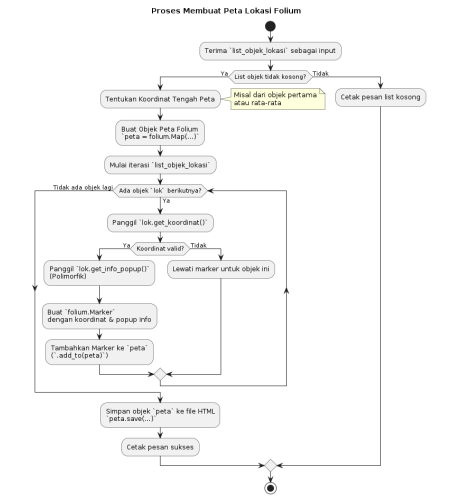

In [97]:
import pandas as pd
import folium
from abc import ABC, abstractmethod

# --- Fungsi Peta Folium ---
def buat_peta_lokasi_folium(list_objek: list, file_output: str = "peta_lokasi.html"):
    """
    Membuat peta Folium interaktif dengan marker untuk setiap objek dalam list_objek.
    """
    if not list_objek:
        print("Tidak ada objek lokasi untuk dipetakan.")
        return

    print(f"\nMemulai pembuatan peta Folium dari {len(list_objek)} lokasi...")

    # try:
    #     lat_tengah = list_objek[0].latitude
    #     lon_tengah = list_objek[0].longitude
    # except IndexError:
    #     lat_tengah, lon_tengah = -6.9929, 110.4200  # Default: Semarang
    try:
        with open('config_peta.txt', 'r') as file:
            baris = file.readlines()
            lat = float(baris[0].strip())
            lon = float(baris[1].strip())
            zoom = int(baris[2].strip())
        # Berhasil memberi ikon centang dan output
        print(f" Berhasil membaca config_peta.txt")
        print(f"{lat}, {lon}, {zoom}")
    except (FileNotFoundError, ValueError, IndexError) as e:
        print(f"⚠️ Gagal membaca config_peta.txt: {e}")

    peta = folium.Map(location=[lat, lon], zoom_start=13, tiles="OpenStreetMap")
    print(f" -> Objek peta dibuat, berpusat di ({lat:.4f}, {lon:.4f})")

    jumlah_marker_valid = 0
    for lok in list_objek:
        koordinat = lok.get_koordinat()
        if koordinat != (0.0, 0.0):
            info_popup_html = lok.get_info_popup() # Mengambil return dari setiap class
            if isinstance(lok, TempatWisata):
              icon = folium.Icon(color='blue', icon='info-sign')
            elif isinstance(lok, Kuliner):
              icon = folium.Icon(color='red', icon='cutlery')
            elif isinstance(lok, TempatIbadah):
                icon = folium.Icon(color='green', icon='home')  # Bisa diartikan sebagai "rumah ibadah"
            elif isinstance(lok, TempatEdukasi):
                icon = folium.Icon(color='orange', icon='star')  # Bisa diartikan sebagai "prestasi pendidikan"
            else:
              icon = folium.Icon(color='gray', icon='info-sign')
            folium.Marker(
                location=koordinat,
                popup=folium.Popup(info_popup_html, max_width=300),
                tooltip=lok.nama,
                icon=icon
            ).add_to(peta)
            jumlah_marker_valid += 1
            print(f"{jumlah_marker_valid}. Berhasil = {repr(lok)}") # Ini yang diubah
        else:
            print(f" -> Melewati marker untuk '{lok.nama}' karena koordinat tidak valid.")

    try:
        peta.save(file_output)
        print(f"\n-> Peta berhasil dibuat dan disimpan sebagai '{file_output}'.")
        print(f" Total marker ditambahkan: {jumlah_marker_valid}")
    except Exception as e:
        print(f"\nERROR saat menyimpan peta Folium: {type(e).__name__} - {e}")

# --- Kode Utama ---
if __name__ == "__main__":
    NAMA_FILE_CSV = "lokasi_semarang.csv"
    NAMA_FILE_PETA = "peta_interaktif_semarang1.html"

    print("--- Memulai Praktikum 5: Visualisasi Peta dengan Folium ---")

    df_lokasi = baca_data_lokasi(NAMA_FILE_CSV)
    list_semua_lokasi = buat_objek_lokasi_dari_df(df_lokasi)
    buat_peta_lokasi_folium(list_semua_lokasi, NAMA_FILE_PETA)

    print(f"\nSilakan buka file '{NAMA_FILE_PETA}' di browser Anda untuk melihat hasilnya.")
    print("\n--- Praktikum 5 Selesai ---")

--- Memulai Praktikum 5: Visualisasi Peta dengan Folium ---

Membuat objek dari DataFrame...
 -> Peringatan: Tipe 'Sekolah Menengah Atas' untuk 'SMA Negeri 3 Semarang' tidak dikenali.
Total 17 objek lokasi berhasil dibuat dari 17 baris data.

Memulai pembuatan peta Folium dari 17 lokasi...
 Berhasil membaca config_peta.txt
-90.9929, 110.42, 1
 -> Objek peta dibuat, berpusat di (-90.9929, 110.4200)
1. Berhasil = TempatWisata(nama='Lawang Sewu', lat=-6.9840, lon=110.4105)
2. Berhasil = TempatWisata(nama='Simpang Lima', lat=-6.9929, lon=110.4200)
3. Berhasil = TempatIbadah(nama='Masjid Agung Jawa Tengah', lat=-6.9892, lon=110.4452)
4. Berhasil = TempatIbadah(nama='Klenteng Sam Poo Kong', lat=-6.9980, lon=110.4030)
5. Berhasil = TempatWisata(nama='Brown Canyon', lat=-7.0375, lon=110.4875)
6. Berhasil = Kuliner(nama='Lumpia Gang Lombok', lat=-6.9718, lon=110.4255)
7. Berhasil = TempatWisata(nama='Kota Lama', lat=-6.9690, lon=110.4250)
8. Berhasil = TempatWisata(nama='Pantai Marina', lat=-6.

# **Praktikum 06: File Handling Tambahan (Menyimpan Log)**

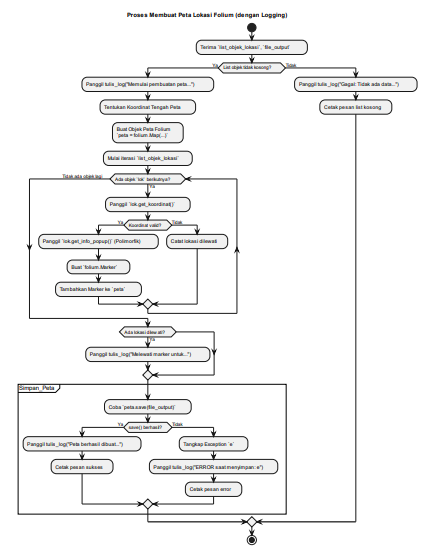

In [91]:
import pandas as pd
import folium
import datetime
import time
from abc import ABC, abstractmethod

# --- Fungsi Logging ---
def tulis_log(pesan: str, file_log="proses_peta.log"):
    timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    try:
        with open(file_log, 'a', encoding='utf-8') as f:
            f.write(f"[{timestamp}] {pesan}\n")
    except IOError as e:
        print(f"ERROR: Gagal menulis ke file log '{file_log}': {e}")

# --- Fungsi Membuat Peta Interaktif ---
def buat_peta_lokasi_folium(list_objek: list, file_output="peta_lokasi.html"):
    nama_fungsi = "buat_peta_lokasi_folium"

    if not list_objek:
        pesan = f"[{nama_fungsi}] Gagal: Tidak ada data lokasi untuk dipetakan."
        print(pesan)
        tulis_log(pesan)
        return

    print(f"\n[{nama_fungsi}] Memulai pembuatan peta dari {len(list_objek)} lokasi...")
    tulis_log(f"[{nama_fungsi}] Memulai pembuatan peta '{file_output}' dengan {len(list_objek)} lokasi.")

    # try:
    #     lat_tengah = list_objek[0].latitude
    #     lon_tengah = list_objek[0].longitude
    # except IndexError:
    #     lat_tengah, lon_tengah = -6.9929, 110.4200

    # Default lokasi Map
    try:
        with open('config_peta.txt', 'r') as file:
            baris = file.readlines()
            lat = float(baris[0].strip())
            lon = float(baris[1].strip())
            zoom = int(baris[2].strip())
        # folium.Map(location=[lat, lon], zoom_start=zoom).add_to(peta)
        # Berhasil memberi ikon centang dan output
        print(f" Berhasil membaca config_peta.txt")
        print(f"{lat}, {lon}, {zoom}")
    except (FileNotFoundError, ValueError, IndexError) as e:
        print(f"⚠️ Gagal membaca config_peta.txt: {e}")

    peta = folium.Map(location=[lat, lon], zoom_start=zoom)
    jumlah_marker = 0
    dilewati = []

    for lokasi in list_objek:
        koordinat = lokasi.get_koordinat()
        if koordinat != (0.0, 0.0):
            info_popup_html = lokasi.get_info_popup() # Mengambil return dari setiap class
            if isinstance(lokasi, TempatWisata):
              icon = folium.Icon(color='blue', icon='info-sign')
            elif isinstance(lokasi, Kuliner):
              icon = folium.Icon(color='red', icon='cutlery')
            elif isinstance(lokasi, TempatIbadah):
                icon = folium.Icon(color='green', icon='home')  # Bisa diartikan sebagai "rumah ibadah"
            elif isinstance(lokasi, TempatEdukasi):
                icon = folium.Icon(color='orange', icon='star')  # Bisa diartikan sebagai "prestasi pendidikan"
            else:
              icon = folium.Icon(color='gray', icon='info-sign')
            folium.Marker(
                location=koordinat,
                popup=folium.Popup(info_popup_html, max_width=300),
                tooltip=lokasi.nama,
                icon=icon
            ).add_to(peta)
            jumlah_marker += 1
        else:
            dilewati.append(lokasi.nama)

    if dilewati:
        pesan = f"[{nama_fungsi}] Melewati marker: {', '.join(dilewati)} (koordinat tidak valid)."
        print(f" -> Peringatan: {pesan}")
        tulis_log(pesan)

    try:
        peta.save(file_output)
        pesan = f"[{nama_fungsi}] Peta '{file_output}' berhasil dibuat dengan {jumlah_marker} marker."
        print(f"-> {pesan}")
        tulis_log(pesan)
    except Exception as e:
        pesan = f"[{nama_fungsi}] ERROR saat menyimpan peta '{file_output}': {type(e).__name__} - {e}"
        print(f"-> {pesan}")
        tulis_log(pesan)

# --- Kode Utama ---
if __name__ == "__main__":
    NAMA_FILE_CSV = "lokasi_semarang.csv"
    NAMA_FILE_PETA = "peta_interaktif_semarang.html"
    FILE_LOG = "proses_peta.log"

    print("--- Memulai Praktikum 6: File Handling Tambahan (Log) ---")
    # Jika ingin mulai dengan log kosong, bisa tambahkan os.remove(FILE_LOG) di sini

    df = baca_data_lokasi(NAMA_FILE_CSV)
    objek_lokasi = buat_objek_lokasi_dari_df(df)
    buat_peta_lokasi_folium(objek_lokasi, NAMA_FILE_PETA)

--- Memulai Praktikum 6: File Handling Tambahan (Log) ---

Membuat objek dari DataFrame...
 -> Peringatan: Tipe 'Sekolah Menengah Atas' untuk 'SMA Negeri 3 Semarang' tidak dikenali.
Total 17 objek lokasi berhasil dibuat dari 17 baris data.

[buat_peta_lokasi_folium] Memulai pembuatan peta dari 17 lokasi...
 Berhasil membaca config_peta.txt
-90.9929, 110.42, 1
-> [buat_peta_lokasi_folium] Peta 'peta_interaktif_semarang.html' berhasil dibuat dengan 17 marker.


# **Web Hoster**

In [41]:
!pip install pyngrok

In [80]:
from pyngrok import ngrok
import time
import subprocess
from google.colab import drive
import requests
import os
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Danish05/Account/ngrok.txt'

with open(file_path, 'r') as f:
    lines = f.readlines()
    for line in lines:
        if "Token:" in line:
            token = line.split("Token:")[1].strip()
            !ngrok config add-authtoken {token}

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [43]:
def web(apps):
  # Step 1: Pastikan kamu ada di folder yang ada file HTML kamu
  os.chdir('/content')  # Atau path file kamu

  # Step 2: Jalankan HTTP Server di background
  port = 8000
  cmd = f"python3 -m http.server {port}"
  process = subprocess.Popen(cmd.split())

  # time.sleep(2)  # Tunggu server jalan dulu
  # Step 3: Buat tunnel ngrok ke port 8000
  public_url = ngrok.connect(port).public_url
  print(f"Ngrok ready at: {public_url}/{apps}")
  killngrok()

def killngrok():
  while True:
    jawab = input('Apakah anda selesai ? Tulis "iya" jika selesai: ').strip().lower()
    if jawab == "iya":
      print("Oke, hancurkan ngrok")
      ngrok.kill()
      break
    else:
      print(f"=== Salah Input ===")

In [99]:
web("peta_interaktif_semarang.html")

Ngrok ready at: https://5df0-35-237-98-51.ngrok-free.app/peta_interaktif_semarang.html
Apakah anda selesai ? Tulis "iya" jika selesai: iya
Oke, hancurkan ngrok
